In [1]:
import pandas as pd # standard python data library
import matplotlib.pyplot as plt # for plotting maps
import geopandas as gp # the geo-version of pandas
import numpy as np
import sys
import os
from statistics import mean, median
from functools import reduce
import glob

# VEST TX 2018
---
## VEST's Documentation

Election results and precinct shapefile from the Texas Legislative Council (https://data.capitol.texas.gov/). The precinct data files available for download at the TXLC Capitol Data Portal are allocated to Census VTD geography based on Voting Age Population from the 2010 Census. The unallocated precinct results and registration statistics were generously provided by TXLC staff to instead merge with the precinct boundaries.

The shapefile includes unallocated Voter Registration (VR) and Spanish Surname Voter Registration (SSVR) for the November 2018 general election. Any VR data analysis of these unallocated precinct results should utilize this unallocated VR data rather than the VR data allocated by VTD available for download at CDP. SSVR is denoted as a percentile of total VR for each precinct.

Precinct results for the following counties were replaced in whole or in part with county source files or with precinct data provided via the Secretary of State: Atascosa, Bexar, Blanco, Borden, Bowie, Brewster, Brown, Carson, Cherokee, Cochran, Comanche, Cooke, Culberson, Duval, Fort Bend, Gillespie, Hartley, Haskell, Hays, Hood, Jefferson, Jim Hogg, Johnson, Lamar, Matagorda, Midland, Nolan, Ochiltree, Robertson, Rockwall, Rusk, Starr, Terrell, Tyler.

Precinct 4/6 in Gonzales was merged prior to 2008. Gonzales 4 was the city of Nixon while Gonzales 6 was the surrounding county precinct. However, they reappear as separate line items in the 2018 general election county report. Since these are otherwise regarded as a unitary precinct and it is unclear that the separate 2018 line items correspond to the obsolete boundaries the results for Gonzales 4/6 were combined in the shapefile.

Precinct totals for the counties listed below do not add up to the Secretary of State County Canvass for one or more offices. Most commonly this is due to omission of some ballots counted after election day from either the county precinct reports or from summary results certified to the state. In some cases these involve data entry errors where numbers were transposed, dropped, or added in one or more precincts or in countywide summations. In some cases corrections to the initial precinct results were made after the certification deadline.

Armstrong, Bailey, Bandera, Baylor, Calhoun, Childress, Cochran, Collingsworth, Cottle, Culberson, Dimmit, Fayette, Galveston, Goliad, Gonzales, Hall, Hartley, Haskell, Hockley, Hudspeth, Jackson, Kent, Live Oak, Loving, McCulloch, Moore, Morris, Motley, Presidio, Reeves, Runnells, San Saba, Somervell, Starr, Stephens, Terrell, Titus, Waller, Ward, Wichita, Willacy, Winkler, Zavala.

Most of the discrepancies are in single digits or low double digits. The exceptions are an 80 vote overreport from Jackson for Ted Cruz (R) for U.S. Senate, a 2000 vote overreport from Galveston for Ken Paxton (R) for Attorney General, a 273 vote underreport from Somervell for Justin Nelson (D) for Attorney General, a 2000 vote underreport from Starr for Jimmy Blacklock (R) for Supreme Court Justice 2, an 8470 vote underreport from Wichita for Steven Kirkland (D) for Supreme Court Justice 2, a 90 vote underreport from Moore for Michelle Slaughter (R) for Criminal Appeals Judge 8, a 10229 vote underreport from Waller for Michelle Slaughter (R) for Criminal Appeals Judge 8, and a 2934 vote underreport from Waller for Mark Ash (L) for Criminal Appeals Judge 8.

Votes reported countywide were distributed by candidate to precincts based on the precinct-level reported vote. This includes all early ballots in Collingsworth, Crockett, Dawson, Hudspeth, Kent, McMullen, and Trinity. Mail ballots in Armstrong. Federal and/or limited ballots in Bexar, Brazos, Hays, Jefferson, and Rockwall. Provisional and military ballots in Bowie.

The following counties reported combined results for some precincts. As these specific precincts align with VTD boundaries the combined results were replaced with the VTD allocated precinct results from the TXLC Capitol Data Portal. Any data corrections or distributions noted above were transferred accordingly.

Bowie: 1A/4E, 1B/2A, 2B/4D/5A, 2D/4A/4C/5B, 13/30, 21/22, 24/25
Dallam: 2/8, 3/5/9
Howard: 11-16/103-105, 24-26/205, 32-35/304, 42-46/404-405, 207-208, 408/409
Kleberg: 33/34
Lamb: 7/8
Lynn: 2/8, 3/10, 4/11
McMullen: 2A/2B, 4A/4B
Newton: 11/13/21
Real: 4/7
Red River: 1/11, 17/18, 27/30
San Saba: 2A/2B, 3A/3B, 4A/4B

* G18VR - Voter registration
* G18SSVR - Spanish surname voter registration


* G18USSRCRU - Ted Cruz (Republican Party)
* G18USSDORO - Beto O'Rourke (Democratic Party)
* G18USSLDIK - Neal M. Dikeman (Libertarian Party)


* G18GOVRABB - Greg Abbott (Republican Party)
* G18GOVDVAL - Lupe Valdez (Democratic Party)
* G18GOVLTIP - Mark Jay Tippetts (Libertarian Party)


* G18LTGRPAT - Dan Patrick (Republican Party)
* G18LTGDCOL - Mike Collier (Democratic Party)
* G18LTGLMCK - Kerry Douglas McKennon (Libertarian Party)


* G18ATGRPAX - Ken Paxton (Republican Party)
* G18ATGDNEL - Justin Nelson (Democratic Party)
* G18ATGLHAR - Michael Ray Harris (Libertarian Party)


* G18COMRHEG - Glenn Hegar (Republican Party)
* G18COMDCHE - Joi Chevalier (Democratic Party)
* G18COMLSAN - Ben Sanders (Libertarian Party)


* G18LANRBUS - George P. Bush (Republican Party)
* G18LANDSUA - Miguel Suazo (Democratic Party)
* G18LANLPIN - Matt Pina (Libertarian Party)


* G18AGRRMIL - Sid Miller (Republican Party)
* G18AGRDOLS - Kim Olson (Democratic Party)
* G18AGRLCAR - Richard Carpenter (Libertarian Party)


* G18RRCRCRA - Christi Craddick (Republican Party)
* G18RRCDMCA - Roman McAllen (Democratic Party)
* G18RRCLWRI - Mike Wright (Libertarian Party)


* G18SSCRBLA - Jimmy Blacklock (Republican Party)
* G18SSCDKIR - Stever Kirkland (Democratic Party)


* G18SSCRDEV - John Devine (Republican Party)
* G18SSCDSAN - R.K. Sandill (Democratic Party)


* G18SSCRBRO - Jeff Brown (Republican Party)
* G18SSCDCHE - Kathy Cheng (Democratic Party)


* G18SCCRKEL - Sharon Keller (Republican Party)
* G18SCCDJAC - Maria T. (Terri) Jackson (Democratic Party)
* G18SCCLSTR - William Bryan Strange III (Libertarian Party)


* G18SCCRHER - Barbara Parker Hervey (Republican Party)
* G18SCCDFRA - Romana Franklin (Democratic Party)


* G18SCCRSLA - Michelle Slaughter (Republican Party)
* G18SCCLASH - Mark Ash (Libertarian Party)


## VEST's Final File

In [2]:
vest_shp = gp.read_file("./raw-from-source/VEST/tx_2018/tx_2018.shp")

In [3]:
vest_shp.shape

(8936, 45)

In [4]:
vest_shp.head(1)

,CNTY,COLOR,PREC,PCTKEY,CNTYKEY,G18VR,G18SSVR,G18USSRCRU,G18USSDORO,G18USSLDIK,...,G18SSCRBRO,G18SSCDCHE,G18SCCRKEL,G18SCCDJAC,G18SCCLSTR,G18SCCRHER,G18SCCDFRA,G18SCCRSLA,G18SCCLASH,geometry
0,113,1,1104,1131104,57,2673,36.7,106,924,5,...,116,897,112,889,17,118,897,157,292,"POLYGON ((1314208.406 1178220.110, 1314211.847..."


<AxesSubplot:>

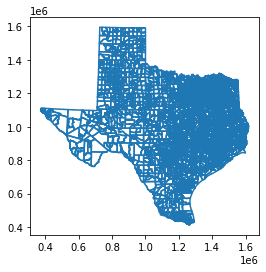

In [5]:
vest_shp.boundary.plot()

In [6]:
vest_shp.columns

Index(['CNTY', 'COLOR', 'PREC', 'PCTKEY', 'CNTYKEY', 'G18VR', 'G18SSVR',
       'G18USSRCRU', 'G18USSDORO', 'G18USSLDIK', 'G18GOVRABB', 'G18GOVDVAL',
       'G18GOVLTIP', 'G18LTGRPAT', 'G18LTGDCOL', 'G18LTGLMCK', 'G18ATGRPAX',
       'G18ATGDNEL', 'G18ATGLHAR', 'G18COMRHEG', 'G18COMDCHE', 'G18COMLSAN',
       'G18LANRBUS', 'G18LANDSUA', 'G18LANLPIN', 'G18AGRRMIL', 'G18AGRDOLS',
       'G18AGRLCAR', 'G18RRCRCRA', 'G18RRCDMCA', 'G18RRCLWRI', 'G18SSCRBLA',
       'G18SSCDKIR', 'G18SSCRDEV', 'G18SSCDSAN', 'G18SSCRBRO', 'G18SSCDCHE',
       'G18SCCRKEL', 'G18SCCDJAC', 'G18SCCLSTR', 'G18SCCRHER', 'G18SCCDFRA',
       'G18SCCRSLA', 'G18SCCLASH', 'geometry'],
      dtype='object')

### Organize VEST File 

In [7]:
# Sort dataframe in order by county key and precinct key
vest_shp = vest_shp.sort_values(['CNTYKEY','PCTKEY'])

In [8]:
# Set county column to display three digits
vest_shp['CNTY'] = vest_shp['CNTY'].astype(str).str.zfill(3)

In [9]:
# Reset index
vest_shp.reset_index(drop=True,inplace=True)

## Election Results

The SOS directed to this link for election results for the 2018 general: https://data.capitol.texas.gov/

In [10]:
# Change setting to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
# Read csv files in Election Results folder
all_files = glob.glob("./raw-from-source/Election_Results/*.csv") 
# Concatenate all files
df = pd.concat((pd.read_csv(f, header = 0) for f in all_files), axis = 1)

# Rename df as tx_18
tx_18 = df.loc[:,~df.columns.duplicated()]

In [12]:
tx_18.columns

Index(['CNTYVTD', 'VTDKEY', 'MillerR_18G_Ag Comm', 'OlsonD_18G_Ag Comm',
       'CarpenterL_18G_Ag Comm', 'PaxtonR_18G_Attorney Gen',
       'NelsonD_18G_Attorney Gen', 'HarrisL_18G_Attorney Gen',
       'HerveyR_18G_CCA 7', 'FranklinD_18G_CCA 7', 'SlaughterR_18G_CCA 8',
       'AshL_18G_CCA 8', 'KellerR_18G_CCA Pres Judge',
       'StrangeL_18G_CCA Pres Judge', 'JacksonD_18G_CCA Pres Judge',
       'HegarR_18G_Comptroller', 'ChevalierD_18G_Comptroller',
       'SandersL_18G_Comptroller', 'AbbottR_18G_Governor',
       'ValdezD_18G_Governor', 'TippettsL_18G_Governor', 'BushR_18G_Land Comm',
       'SuazoD_18G_Land Comm', 'PinaL_18G_Land Comm',
       'PatrickR_18G_Lt. Governor', 'CollierD_18G_Lt. Governor',
       'McKennonL_18G_Lt. Governor', 'CraddickR_18G_RR Comm 1',
       'McAllenD_18G_RR Comm 1', 'WrightL_18G_RR Comm 1',
       'BlacklockR_18G_Sup Ct 2', 'KirklandD_18G_Sup Ct 2',
       'DevineR_18G_Sup Ct 4', 'SandillD_18G_Sup Ct 4', 'BrownR_18G_Sup Ct 6',
       'ChengD_18G_Sup

In [13]:
# Rename the columns to match VEST
tx_18 = tx_18.rename(columns = {'MillerR_18G_Ag Comm':'G18AGRRMIL', 
                                 'OlsonD_18G_Ag Comm':'G18AGRDOLS',
                                 'CarpenterL_18G_Ag Comm':'G18AGRLCAR', 
                                 'PaxtonR_18G_Attorney Gen':'G18ATGRPAX',
                                 'NelsonD_18G_Attorney Gen':'G18ATGDNEL', 
                                 'HarrisL_18G_Attorney Gen':'G18ATGLHAR',
                                 'HerveyR_18G_CCA 7':'G18SCCRHER', 
                                 'FranklinD_18G_CCA 7':'G18SCCDFRA', 
                                 'SlaughterR_18G_CCA 8':'G18SCCRSLA',
                                 'AshL_18G_CCA 8':'G18SCCLASH', 
                                 'KellerR_18G_CCA Pres Judge':'G18SCCRKEL',
                                 'StrangeL_18G_CCA Pres Judge':'G18SCCLSTR', 
                                 'JacksonD_18G_CCA Pres Judge':'G18SCCDJAC',
                                 'HegarR_18G_Comptroller':'G18COMRHEG', 
                                 'ChevalierD_18G_Comptroller':'G18COMDCHE',
                                 'SandersL_18G_Comptroller':'G18COMLSAN', 
                                 'AbbottR_18G_Governor':'G18GOVRABB',
                                 'ValdezD_18G_Governor':'G18GOVDVAL', 
                                 'TippettsL_18G_Governor':'G18GOVLTIP', 
                                 'BushR_18G_Land Comm':'G18LANRBUS',
                                 'SuazoD_18G_Land Comm':'G18LANDSUA', 
                                 'PinaL_18G_Land Comm':'G18LANLPIN',
                                 'PatrickR_18G_Lt. Governor':'G18LTGRPAT', 
                                 'CollierD_18G_Lt. Governor':'G18LTGDCOL',
                                 'McKennonL_18G_Lt. Governor':'G18LTGLMCK', 
                                 'CraddickR_18G_RR Comm 1':'G18RRCRCRA',
                                 'McAllenD_18G_RR Comm 1':'G18RRCDMCA', 
                                 'WrightL_18G_RR Comm 1':'G18RRCLWRI',
                                 'BlacklockR_18G_Sup Ct 2':'G18SSCRBLA', 
                                 'KirklandD_18G_Sup Ct 2':'G18SSCDKIR',
                                 'DevineR_18G_Sup Ct 4':'G18SSCRDEV', 
                                 'SandillD_18G_Sup Ct 4':'G18SSCDSAN', 
                                 'BrownR_18G_Sup Ct 6':'G18SSCRBRO',
                                 'ChengD_18G_Sup Ct 6':'G18SSCDCHE', 
                                 'CruzR_18G_U.S. Sen':'G18USSRCRU', 
                                 "O'RourkeD_18G_U.S. Sen":'G18USSDORO',
                                 'DikemanL_18G_U.S. Sen':'G18USSLDIK'})

# Reorder the columns to match VEST
tx_18 = tx_18[['CNTYVTD', 'VTDKEY',
       'G18USSRCRU', 'G18USSDORO', 'G18USSLDIK', 'G18GOVRABB', 'G18GOVDVAL',
       'G18GOVLTIP', 'G18LTGRPAT', 'G18LTGDCOL', 'G18LTGLMCK', 'G18ATGRPAX',
       'G18ATGDNEL', 'G18ATGLHAR', 'G18COMRHEG', 'G18COMDCHE', 'G18COMLSAN',
       'G18LANRBUS', 'G18LANDSUA', 'G18LANLPIN', 'G18AGRRMIL', 'G18AGRDOLS',
       'G18AGRLCAR', 'G18RRCRCRA', 'G18RRCDMCA', 'G18RRCLWRI', 'G18SSCRBLA',
       'G18SSCDKIR', 'G18SSCRDEV', 'G18SSCDSAN', 'G18SSCRBRO', 'G18SSCDCHE',
       'G18SCCRKEL', 'G18SCCDJAC', 'G18SCCLSTR', 'G18SCCRHER', 'G18SCCDFRA',
       'G18SCCRSLA', 'G18SCCLASH']]

In [14]:
# Extract first three digits of CNTYVTD column and create a new column that shows the county information
tx_18['CNTY'] = tx_18['CNTYVTD'].str[:3]

## Secretary of State
According to VEST documentation, precinct results for the following counties were replaced in whole or in part with county source files or with precinct data provided via the Secretary of State: Atascosa, Bexar, Blanco, Borden, Bowie, Brewster, Brown, Carson, Cherokee, Cochran, Comanche, Cooke, Culberson, Duval, Fort Bend, Gillespie, Hartley, Haskell, Hays, Hood, Jefferson, Jim Hogg, Johnson, Lamar, Matagorda, Midland, Nolan, Ochiltree, Robertson, Rockwall, Rusk, Starr, Terrell, Tyler.

The election results from Texas Legislative have been replaced with the election results from Texas Secretary of State for those counties. 

In [15]:
# Read all csv files in Secretary of State folder (county)
# Tried to validate county level results prior to receiving precinct level data
all_files2 = glob.glob("./raw-from-source/SOS/county-data/*.csv")
# Concatenate all files
df = pd.concat((pd.read_csv(f, header = 0) for f in all_files2), axis = 1)

# Rename df as txsos_18
txsos_18 = df.loc[:,~df.columns.duplicated()]

In [16]:
# Rename the columns to match VEST
txsos_18 = txsos_18.rename(columns = {'Sid Miller':'G18AGRRMIL', 
                                   'Kim Olson':'G18AGRDOLS', 
                                   'Richard Carpenter':'G18AGRLCAR', 
                                   'Ken Paxton':'G18ATGRPAX',
                                   'Justin Nelson':'G18ATGDNEL', 
                                   'Michael Ray Harris':'G18ATGLHAR', 
                                   'Glenn Hegar':'G18COMRHEG', 
                                   'Joi Chevalier':'G18COMDCHE',
                                   'Ben Sanders':'G18COMLSAN',
                                   'Greg Abbott':'G18GOVRABB',
                                   'Lupe Valdez':'G18GOVDVAL', 
                                   'Mark Jay Tippetts':'G18GOVLTIP',
                                   'George P. Bush':'G18LANRBUS', 
                                   'Miguel Suazo':'G18LANDSUA', 
                                   'Matt Pina':'G18LANLPIN', 
                                   'Dan Patrick':'G18LTGRPAT',
                                   'Mike Collier':'G18LTGDCOL', 
                                   'Kerry Douglas McKennon':'G18LTGLMCK',
                                   'Christi Craddick':'G18RRCRCRA',
                                   'Roman McAllen':'G18RRCDMCA', 
                                   'Mike Wright':'G18RRCLWRI', 
                                   'Jimmy Blacklock':'G18SSCRBLA', 
                                   'Steven Kirkland':'G18SSCDKIR',
                                   'John Devine':'G18SSCRDEV',
                                   'R.K. Sandill':'G18SSCDSAN',
                                   'Jeff Brown':'G18SSCRBRO',
                                   'Kathy Cheng':'G18SSCDCHE',
                                   'Sharon Keller':'G18SCCRKEL', 
                                   'Maria T. (Terri) Jackson':'G18SCCDJAC',
                                   'William Bryan Strange III':'G18SCCLSTR', 
                                   'Barbara Parker Hervey':'G18SCCRHER', 
                                   'Ramona Franklin':'G18SCCDFRA',
                                   'Michelle Slaughter':'G18SCCRSLA', 
                                   'Mark Ash':'G18SCCLASH', 
                                   'Ted Cruz':'G18USSRCRU', 
                                   "Beto O'Rourke":'G18USSDORO',
                                   'Neal M. Dikeman':'G18USSLDIK'})

# Reorder the columns to match VEST
txsos_18 = txsos_18[['County',
       'G18USSRCRU', 'G18USSDORO', 'G18USSLDIK', 'G18GOVRABB', 'G18GOVDVAL',
       'G18GOVLTIP', 'G18LTGRPAT', 'G18LTGDCOL', 'G18LTGLMCK', 'G18ATGRPAX',
       'G18ATGDNEL', 'G18ATGLHAR', 'G18COMRHEG', 'G18COMDCHE', 'G18COMLSAN',
       'G18LANRBUS', 'G18LANDSUA', 'G18LANLPIN', 'G18AGRRMIL', 'G18AGRDOLS',
       'G18AGRLCAR', 'G18RRCRCRA', 'G18RRCDMCA', 'G18RRCLWRI', 'G18SSCRBLA',
       'G18SSCDKIR', 'G18SSCRDEV', 'G18SSCDSAN', 'G18SSCRBRO', 'G18SSCDCHE',
       'G18SCCRKEL', 'G18SCCDJAC', 'G18SCCLSTR', 'G18SCCRHER', 'G18SCCDFRA',
       'G18SCCRSLA', 'G18SCCLASH']]

In [17]:
county_col = txsos_18['County']

In [18]:
# Change county names form to match TLC election results files
txsos_18['County'] = txsos_18['County'].str.lower()
txsos_18['County'] = txsos_18['County'].str.capitalize()

### Use FIPS File to create a County Name Column

In [19]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Texas"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
tx_fips_dict = dict(zip(fips_file["FIPS County"],fips_file["County Name"]))
tx_fips_dict2 = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

#Use the dictionary to go from a county FIPS to a county name
tx_18["CNTY_NAME"] = tx_18["CNTY"].map(tx_fips_dict).fillna(tx_18["CNTY"])
txsos_18["CNTY"] = txsos_18["County"].map(tx_fips_dict2).fillna(txsos_18["County"])
vest_shp["CNTY_NAME"] = vest_shp["CNTY"].map(tx_fips_dict).fillna(vest_shp["CNTY"])

In [20]:
txsos_18.rename(columns = {'County':'CNTY_NAME'}, inplace = True)

### Counties precinct results for the following counties were replaced in whole or in part with county source files or with precinct data provided via the Secretary of State

In [21]:
sos_counties = ['Atascosa', 'Bexar', 'Blanco', 'Borden', 'Bowie', 'Brewster', 'Brown', 'Carson', 'Cherokee', 'Cochran', 'Comanche', 'Cooke', 'Culberson', 'Duval', 'Fort Bend', 'Gillespie', 'Hartley', 'Haskell', 'Hays', 'Hood', 'Jefferson', 'Jim Hogg', 'Johnson', 'Lamar', 'Matagorda', 'Midland', 'Nolan', 'Ochiltree', 'Robertson', 'Rockwall', 'Rusk', 'Starr', 'Terrell', 'Tyler']

In [22]:
tx_18 = tx_18[~tx_18['CNTY_NAME'].isin(sos_counties)]

In [23]:
txsos_ctny = txsos_18[txsos_18['CNTY_NAME'].str.contains('|'.join(sos_counties))]

In [24]:
tx_18 = tx_18.append(txsos_ctny)

In [25]:
# Test dataframe
tx_2018 = tx_18

In [26]:
tx_2018 = tx_2018.drop(labels = ['CNTYVTD','VTDKEY'],axis = 1)

In [27]:
tx_2018.reset_index(drop=True,inplace=True)

In [28]:
data_columns = ['G18USSRCRU', 'G18USSDORO', 'G18USSLDIK', 'G18GOVRABB', 'G18GOVDVAL',
       'G18GOVLTIP', 'G18LTGRPAT', 'G18LTGDCOL', 'G18LTGLMCK', 'G18ATGRPAX',
       'G18ATGDNEL', 'G18ATGLHAR', 'G18COMRHEG', 'G18COMDCHE', 'G18COMLSAN',
       'G18LANRBUS', 'G18LANDSUA', 'G18LANLPIN', 'G18AGRRMIL', 'G18AGRDOLS',
       'G18AGRLCAR', 'G18RRCRCRA', 'G18RRCDMCA', 'G18RRCLWRI', 'G18SSCRBLA',
       'G18SSCDKIR', 'G18SSCRDEV', 'G18SSCDSAN', 'G18SSCRBRO', 'G18SSCDCHE',
       'G18SCCRKEL', 'G18SCCDJAC', 'G18SCCLSTR', 'G18SCCRHER', 'G18SCCDFRA',
       'G18SCCRSLA', 'G18SCCLASH']

In [29]:
tx_2018[data_columns] = tx_2018[data_columns].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [30]:
# After running the county-level data, found out there are non-integer values
# Have to fix concatenation before proceeding. Election results did not join right.
tx_2018[data_columns] = tx_2018[data_columns].replace(',','',regex = True).astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [31]:
tx_2018.dtypes

G18USSRCRU    float64
G18USSDORO    float64
G18USSLDIK    float64
G18GOVRABB    float64
G18GOVDVAL    float64
G18GOVLTIP    float64
G18LTGRPAT    float64
G18LTGDCOL    float64
G18LTGLMCK    float64
G18ATGRPAX    float64
G18ATGDNEL    float64
G18ATGLHAR    float64
G18COMRHEG    float64
G18COMDCHE    float64
G18COMLSAN    float64
G18LANRBUS    float64
G18LANDSUA    float64
G18LANLPIN    float64
G18AGRRMIL    float64
G18AGRDOLS    float64
G18AGRLCAR    float64
G18RRCRCRA    float64
G18RRCDMCA    float64
G18RRCLWRI    float64
G18SSCRBLA    float64
G18SSCDKIR    float64
G18SSCRDEV    float64
G18SSCDSAN    float64
G18SSCRBRO    float64
G18SSCDCHE    float64
G18SCCRKEL    float64
G18SCCDJAC    float64
G18SCCLSTR    float64
G18SCCRHER    float64
G18SCCDFRA    float64
G18SCCRSLA    float64
G18SCCLASH    float64
CNTY           object
CNTY_NAME      object
dtype: object

# Validating Election Results

## Statewide Candidate Totals

In [32]:
data_columns = ['G18USSRCRU', 'G18USSDORO', 'G18USSLDIK', 'G18GOVRABB', 'G18GOVDVAL',
       'G18GOVLTIP', 'G18LTGRPAT', 'G18LTGDCOL', 'G18LTGLMCK', 'G18ATGRPAX',
       'G18ATGDNEL', 'G18ATGLHAR', 'G18COMRHEG', 'G18COMDCHE', 'G18COMLSAN',
       'G18LANRBUS', 'G18LANDSUA', 'G18LANLPIN', 'G18AGRRMIL', 'G18AGRDOLS',
       'G18AGRLCAR', 'G18RRCRCRA', 'G18RRCDMCA', 'G18RRCLWRI', 'G18SSCRBLA',
       'G18SSCDKIR', 'G18SSCRDEV', 'G18SSCDSAN', 'G18SSCRBRO', 'G18SSCDCHE',
       'G18SCCRKEL', 'G18SCCDJAC', 'G18SCCLSTR', 'G18SCCRHER', 'G18SCCDFRA',
       'G18SCCRSLA', 'G18SCCLASH']
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [33]:
statewide_totals_check(vest_shp,tx_18,data_columns)

***Statewide Totals Check***


TypeError: unsupported operand type(s) for +: 'int' and 'str'

## County Totals

#### Create a FIPS dictionary

In [ ]:
# #Load in the nationwide FIPS file
# fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
# fips_file = fips_file[fips_file["State"]=="Tennessee"]
# fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

# #Make the FIPS three digits
# fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

# #Create the dictionary
# TN_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

# # #Modify county names in dataframe to match the FIPs file
# # county_name_changes_dict = {"DeKalb":"Dekalb"}
# # president_election_16["COUNTYFP"] = president_election_16["County"].map(county_name_changes_dict).fillna(president_election_16["County"])

# #Use the dictionary to go from a county name to a county FIPS
# president_election_16["COUNTYFP"] = president_election_16["County"].map(TN_fips_dict).fillna(president_election_16["County"])

# vest_shp["COUNTYFP"] = vest_shp["COUNTY_NAME"].map(TN_fips_dict).fillna(vest_shp["COUNTY_NAME"])

In [ ]:
# Check the number of counties - looking for 254
print(len(tx_18["CNTY"].unique()))
print(len(vest_shp["CNTY"].unique()))

In [ ]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+str(val)+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")

In [ ]:
county_totals_check(vest_shp,tx_18,data_columns,"CNTY", full_print=False)

In [ ]:
# print(len(tx_18["CNTYVTD"].unique()))
# print(len(vest_shp["PCTKEY"].unique()))

## Precinct Totals

### Join Attempt 1

In [ ]:
vest_shp["unique_ID"] = vest_shp['CNTY']+vest_shp['PREC']
tx_18["unique_ID"]=tx_18["CNTYVTD"]

In [ ]:
empty_precincts = []
for index, row in tx_18.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["unique_ID"])
print(len(empty_precincts))

In [ ]:
print(empty_precincts)

In [ ]:
# vest_shp = vest_shp[~vest_shp.join_col.isin(empty_precincts)]
# tx_18 = tx_18[~tx_18.join_col.isin(empty_precincts)]

In [ ]:
# Merge the split precincts into one

# Election Results
tx_18['unique_ID']=tx_18['unique_ID'].map(lambda x: x.rstrip('ABCDEF'))
tx_18 = tx_18.groupby('unique_ID').sum()

# VEST
vest_shp['unique_ID']=vest_shp['unique_ID'].map(lambda x: x.rstrip('ABCDEF'))
vest_shp = vest_shp.groupby('unique_ID').sum()

In [ ]:
# tx_18

In [ ]:
# vest_shp

In [ ]:
join_one = pd.merge(vest_shp,tx_18,how="outer",on="unique_ID",indicator=True)

In [ ]:
join_one["_merge"].value_counts()

In [ ]:
join_one[join_one["_merge"] == "left_only"].to_csv("./vest_only.csv")
join_one[join_one["_merge"] == "right_only"].to_csv("./election_only.csv")

### Join Attempt 2

In [ ]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [ ]:
precinct_votes_check(join_one,data_columns,True,"unique_ID")

In [ ]:
join_one

# unique_ID is the index

In [ ]:
precinct_votes_check(join_one[join_one["_merge"]=="both"],data_columns,True,"unique_ID")